# 개와 고양이 사진 분류
- 로컬 PC에 저장되어 있는 이미지 데이터를 로딩해서 학습시키기

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 데이터 준비

In [12]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-01-05 04:48:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   135MB/s    in 0.5s    

2023-01-05 04:48:19 (135 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [13]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [14]:
import os

data_root = '/content/cats_and_dogs_filtered'
data_root

'/content/cats_and_dogs_filtered'

In [15]:
train_dir = os.path.join(data_root, 'train')
val_dir = os.path.join(data_root, 'validation')

In [16]:
# 파일명 리스트 구하기

train_cats_fname = os.listdir(os.path.join(train_dir, 'cats'))
train_dogs_fname = os.listdir(os.path.join(train_dir, 'dogs'))

print('cats:', len(train_cats_fname))
print('dogs:', len(train_dogs_fname))

cats: 1000
dogs: 1000


In [17]:
class_name = ['cat', 'dog']

In [18]:
import PIL

X_train = []
y_train = []

for i in range(len(train_cats_fname)):
    f = os.path.join(train_dir, 'cats', train_cats_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)                                              #고양이 0번째


In [19]:
for i in range(len(train_dogs_fname)):
    f = os.path.join(train_dir, 'dogs', train_dogs_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)                                              #강아지 1번째

# 검증 데이터

In [20]:
# 파일명 리스트 구하기

val_cats_fname = os.listdir(os.path.join(val_dir, 'cats'))
val_dogs_fname = os.listdir(os.path.join(val_dir, 'dogs'))

print('cats:', len(val_cats_fname))
print('dogs:', len(val_dogs_fname))

cats: 500
dogs: 500


In [21]:
import PIL

X_val = []
y_val = []

for i in range(len(val_cats_fname)):
    f = os.path.join(val_dir, 'cats', val_cats_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_val.append(arr)
    y_val.append(0) 

In [22]:
for i in range(len(val_dogs_fname)):
    f = os.path.join(val_dir, 'dogs', val_dogs_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_val.append(arr)
    y_val.append(1)

In [23]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2000, 224, 224, 3) (2000,)
(1000, 224, 224, 3) (1000,)


In [24]:
from sklearn.model_selection import train_test_split

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2, shuffle=True)           #val, test 데이터 8:2로 나눔

print(X_val.shape, X_test.shape) 
print(y_val.shape, y_test.shape)

(800, 224, 224, 3) (200, 224, 224, 3)
(800,) (200,)


In [15]:
# 정규화
# 모델
# 컴파일
# callback
# 학습
# 그래프
# 평가
# 혼동행렬

In [25]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [26]:
X_train.shape

(2000, 224, 224, 3)

In [27]:
X_val.shape

(800, 224, 224, 3)

In [28]:
X_test.shape

(200, 224, 224, 3)

In [29]:
y_train.shape

(2000,)

In [30]:
model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),                                                 
    layers.MaxPooling2D(2),
    layers.Dropout(0.5),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2), 
    layers.Dropout(0.5),
    
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2), 
    layers.Dropout(0.5),

    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(2), 
    layers.Dropout(0.5),

    layers.Flatten(), 

    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid')                                           
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [32]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val),
                verbose=1)

Epoch 1/30
63/63 [==============================] - 16s 100ms/step - loss: 0.8384 - acc: 0.5000 - val_loss: 0.6926 - val_acc: 0.5088
Epoch 2/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6946 - acc: 0.4880 - val_loss: 0.6932 - val_acc: 0.4913
Epoch 3/30
63/63 [==============================] - 5s 87ms/step - loss: 0.6933 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.4913
Epoch 4/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6934 - val_acc: 0.4913
Epoch 5/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6927 - acc: 0.5060 - val_loss: 0.6924 - val_acc: 0.5175
Epoch 6/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6921 - acc: 0.5170 - val_loss: 0.6897 - val_acc: 0.4963
Epoch 7/30
63/63 [==============================] - 5s 87ms/step - loss: 0.6900 - acc: 0.5270 - val_loss: 0.6871 - val_acc: 0.5625
Epoch 8/30
63/63 [==============================] - 5s 87ms/step - loss: 0.6845 -

In [33]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

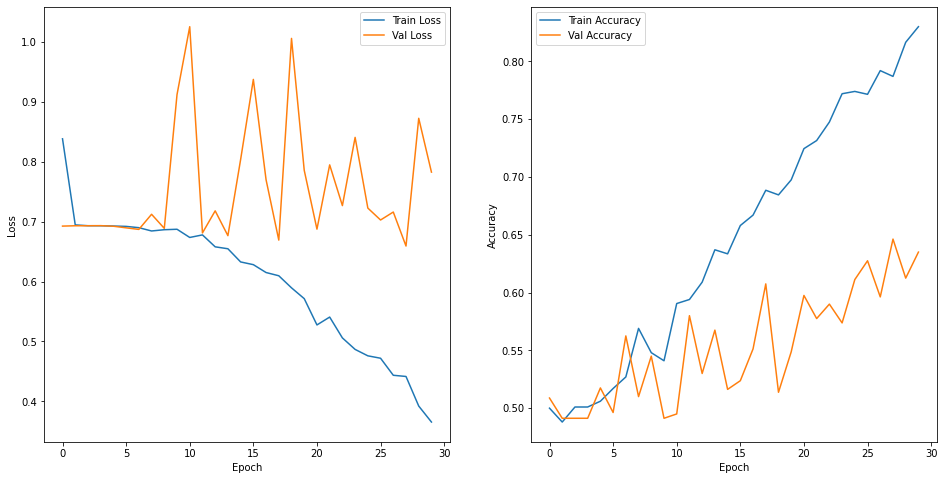

In [34]:
plot_history(log)

In [36]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 28ms/step - loss: 0.7044 - acc: 0.6650


[0.7043686509132385, 0.6650000214576721]

In [37]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred

7/7 [==============================] - 0s 26ms/step


array([7.9868120e-01, 9.2429179e-01, 1.0076295e-01, 7.2024994e-02,
       1.1759020e-01, 2.5580995e-02, 1.7545439e-02, 1.3411173e-01,
       1.3049784e-01, 1.2724119e-01, 6.4294869e-01, 8.5563570e-01,
       7.2971813e-02, 1.3405003e-01, 4.5018256e-01, 2.9272851e-02,
       7.7235341e-02, 1.1290971e-01, 3.9296368e-01, 9.4044663e-02,
       7.1640149e-02, 2.2142027e-01, 4.8027325e-02, 4.2216510e-02,
       1.1238594e-01, 1.9588102e-01, 3.3940431e-02, 4.1241281e-02,
       3.9718968e-01, 8.4163761e-01, 3.6370361e-01, 1.6732073e-01,
       6.2003607e-01, 1.6423680e-01, 5.0628722e-01, 6.2336095e-02,
       7.4626133e-02, 1.4919211e-01, 1.9767238e-01, 3.5594454e-01,
       1.8752164e-01, 4.9931607e-01, 8.5599653e-02, 4.0549251e-01,
       1.7336218e-01, 2.3092817e-01, 6.5685642e-01, 5.0284097e-04,
       7.4200720e-02, 8.2248890e-01, 6.2179931e-02, 4.2440042e-01,
       4.3832395e-02, 4.2151856e-01, 4.6874961e-01, 4.3519832e-02,
       2.8251022e-01, 3.7061954e-01, 5.1835185e-01, 1.9448550e

In [38]:
y_pred = (y_pred > 0.5).astype(int)                                #y_pred > 0.5 기준 [1,0]으로 변경
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [39]:
y_test

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

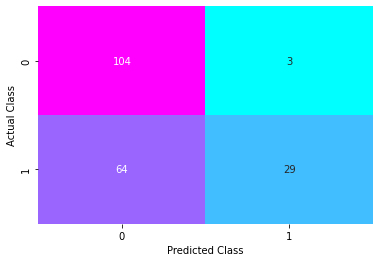

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False, cmap='cool', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [40]:
model = keras.Sequential([
    layers.Conv2D(128, 3, input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),                                                                  
    layers.MaxPooling2D(2),
    
    layers.Conv2D(256, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2), 

    layers.Flatten(),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid'),                                            
    ])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 batch_normalization_6 (Batc  (None, 222, 222, 128)    512       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 256)     295168    
                                                                 
 batch_normalization_7 (Batc  (None, 109, 109, 256)   

In [42]:
from tensorflow.keras import callbacks

ckpt_path = 'catsanddogs.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor = 'val_loss',
    save_weights_only = True,
    save_best_only = True,
    verbose = 1
)

In [43]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val),
                verbose=1)

Epoch 1/30
63/63 [==============================] - 23s 320ms/step - loss: 12.1994 - acc: 0.4970 - val_loss: 0.6931 - val_acc: 0.4975
Epoch 2/30
63/63 [==============================] - 17s 276ms/step - loss: 0.6932 - acc: 0.4660 - val_loss: 0.6931 - val_acc: 0.5025
Epoch 3/30
63/63 [==============================] - 17s 272ms/step - loss: 0.6932 - acc: 0.4900 - val_loss: 0.6931 - val_acc: 0.4975
Epoch 4/30
63/63 [==============================] - 18s 283ms/step - loss: 0.6932 - acc: 0.4910 - val_loss: 0.6931 - val_acc: 0.4975
Epoch 5/30
63/63 [==============================] - 17s 272ms/step - loss: 0.6932 - acc: 0.4970 - val_loss: 0.6931 - val_acc: 0.5025
Epoch 6/30
63/63 [==============================] - 18s 283ms/step - loss: 0.6932 - acc: 0.4830 - val_loss: 0.6931 - val_acc: 0.5025
Epoch 7/30
63/63 [==============================] - 18s 284ms/step - loss: 0.6932 - acc: 0.4880 - val_loss: 0.6931 - val_acc: 0.5025
Epoch 8/30
63/63 [==============================] - 18s 289ms/step -

KeyboardInterrupt: ignored

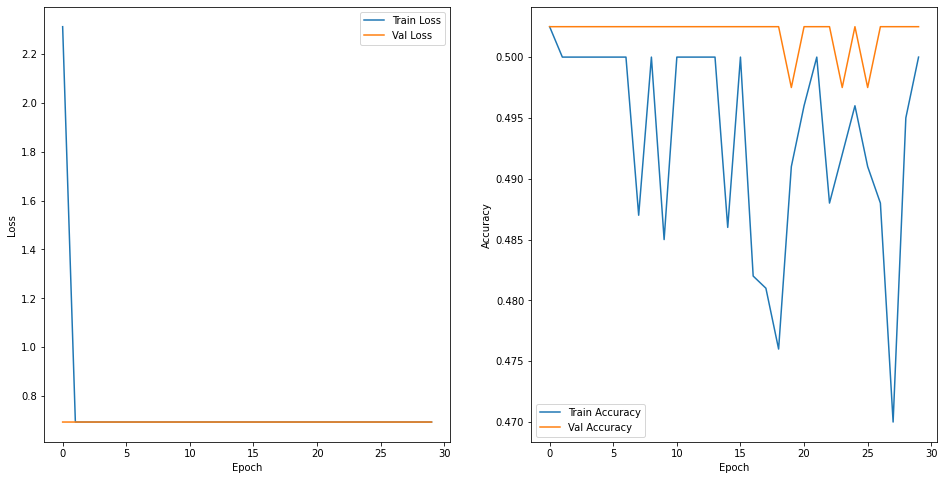

In [30]:
plot_history(log)

In [31]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 28ms/step - loss: 0.6932 - acc: 0.4900


[0.6931663751602173, 0.49000000953674316]

In [32]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred

7/7 [==============================] - 0s 25ms/step


array([0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046855,
       0.50046855, 0.50046855, 0.50046855, 0.50046855, 0.50046

In [33]:
y_pred = (y_pred > 0.5).astype(int)                                #y_pred > 0.5 기준 [1,0]으로 변경
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [34]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0])

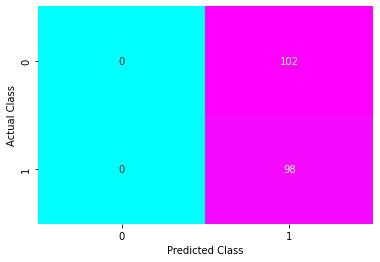

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False, cmap='cool', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()